
- Classification concepts
- Logistic regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from scipy.stats import norm
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

plt.style.use('ggplot')

%matplotlib inline

We start with an artificially generated problem.  Inputs will be points in a 2-D space, and targets will be classes simply labeled as 'a' and 'b'.

In [7]:
# ensure repeatability of this notebook
# (comment out for new results each run)
np.random.seed(12345)

def f(X):
    return 3 + 0.25 * X - X**2 + 0.55 * X**3

# convenience function for generating samples
def sample(n, fn, limits, sigma):
    width = limits[1] - limits[0]
    height = limits[3] - limits[2]
    x = np.random.random(n) * width + limits[0]
    y = np.random.random(n) * height + limits[2]
    s = y > fn(x)
    p = norm.cdf(np.abs(y - fn(x)), scale = sigma)
    r = np.random.random(n)

    def assign(sign, prob, rnum):
        if sign:
            if rnum > prob:
                return 'b'
            else:
                return 'a'
        else:
            if rnum > prob:
                return 'a'
            else:
                return 'b'

    c = [assign(s[i], p[i], r[i]) for i in range(n)]

    return DataFrame({'x' : x, 'y' : y, 'class' : c})


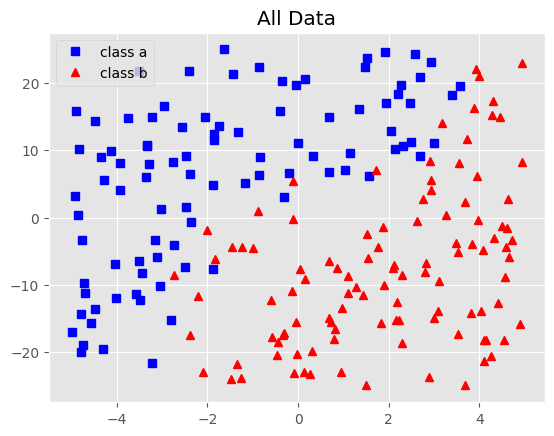

In [8]:
data = sample(200, f, [-5, 5, -25, 25], 5)

dataa = data[data['class']=='a']
datab = data[data['class']=='b']


plt.plot(dataa['x'], dataa['y'],'bs', label='class a')
plt.plot(datab['x'], datab['y'],'r^', label='class b')
plt.legend()
plt.title('All Data')
plt.show()

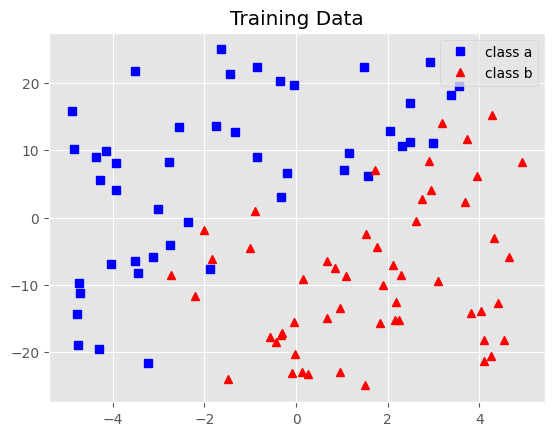

In [9]:
train, test = train_test_split(data, test_size = 0.5)
traina = train[train['class']=='a']
trainb = train[train['class']=='b']
plt.plot(traina['x'], traina['y'],'bs', label='class a')
plt.plot(trainb['x'], trainb['y'],'r^', label='class b')
plt.legend()
plt.title('Training Data')


plt.show()

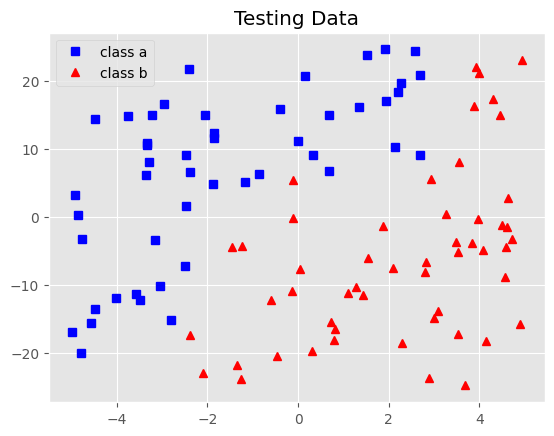

In [10]:
testa = test[test['class']=='a']
testb = test[test['class']=='b']
plt.plot(testa['x'], testa['y'],'bs', label='class a')
plt.plot(testb['x'], testb['y'],'r^', label='class b')
plt.legend()
plt.title('Testing Data')

plt.show()

## *k*-NN Classification
Suppose we have a new point and we do not know its class. So we account for the *k* nearest points to determine its class.

In [11]:
from sklearn import neighbors
k = 5
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])

KNeighborsClassifier()

First, we apply the trained model to the test data.  Correctly classified points are shown as solid, misclassified points as bordered.  Colors and shapes match the prediction (not the ground truth).

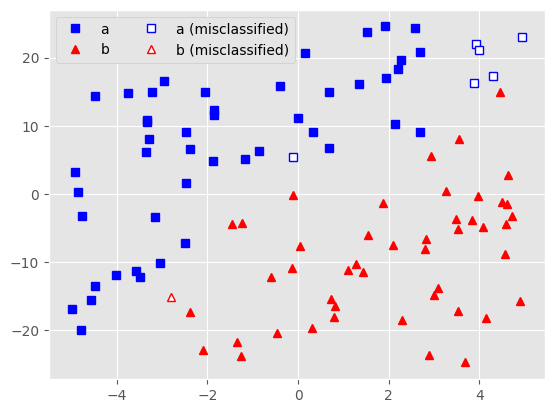

In [12]:
def plot_predicted_1(model, test):
    predicted = model.predict(test[['x','y']])
    correct = test[test['class'] == predicted]
    correcta = correct[correct['class'] == 'a']
    correctb = correct[correct['class'] == 'b']
    incorrect = test[test['class'] != predicted]
    incorrecta = incorrect[incorrect['class'] == 'b']
    incorrectb = incorrect[incorrect['class'] == 'a']

    plt.plot(correcta['x'], correcta['y'], 'bs', label='a')
    plt.plot(correctb['x'], correctb['y'], 'r^', label='b')
    plt.plot(incorrecta['x'], incorrecta['y'], 'bs',
             markerfacecolor='w', label='a (misclassified)')
    plt.plot(incorrectb['x'], incorrectb['y'], 'r^',
             markerfacecolor='w', label='b (misclassified)')
    plt.legend(loc='upper left', ncol=2, framealpha=1)




plot_predicted_1(model, test)

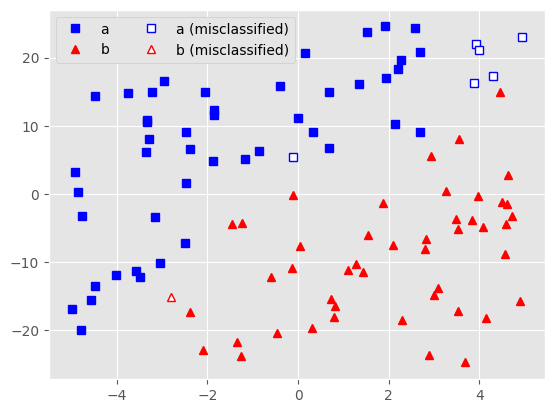

In [13]:


plot_predicted_1(model, test)

This does not show the original training data, so it is difficult to determine where the misclassifications came from. The next plot shows the "decision boundary" - the dividing line between classes.

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


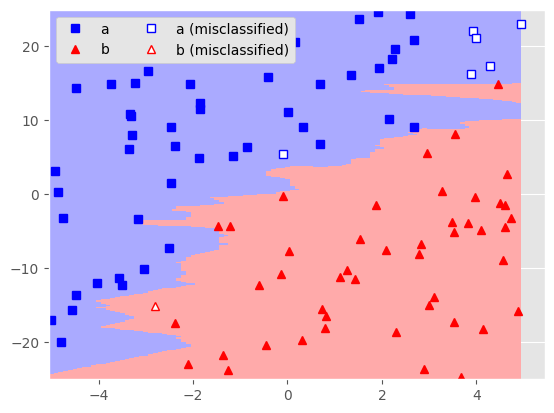

In [14]:
def plot_predicted_2(model, test):
    cmap = ListedColormap(['#AAAAFF','#FFAAAA'])
    xmin, xmax, ymin, ymax = -5, 5, -25, 25
    grid_size = 0.1
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grid_size),
                         np.arange(ymin, ymax, grid_size))
    pp = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.array([{'a':0,'b':1}[ab] for ab in pp])
    zz = zz.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plot_predicted_1(model, test)
plot_predicted_2(model, test)



plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


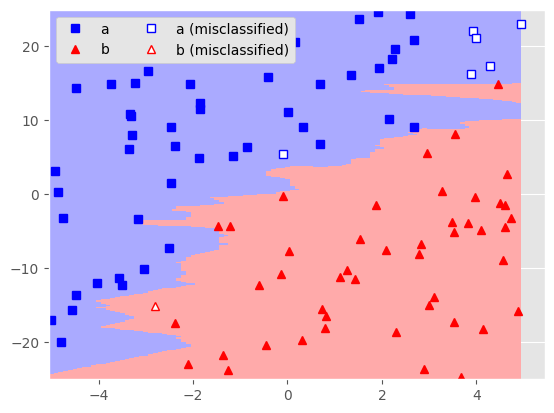

In [15]:
plot_predicted_2(model, test)
plt.show()

Using the functions we wrote above, we next plot all data, or just the training data

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


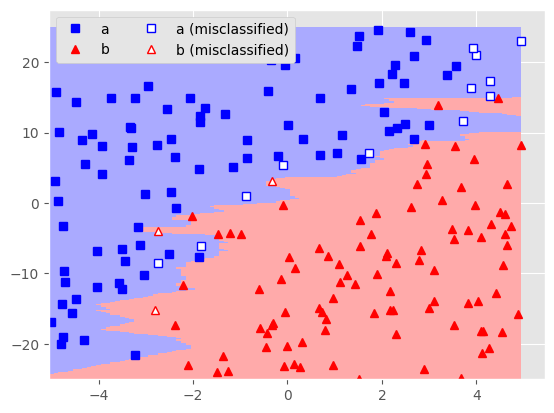

In [16]:
plot_predicted_2(model, data)
plt.show()

## Model Complexity with *k*-Nearest Neighbors
---
Previous plot used k = 5 that resulted in a smooth decision boundary.

What happens if we change *k*?

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


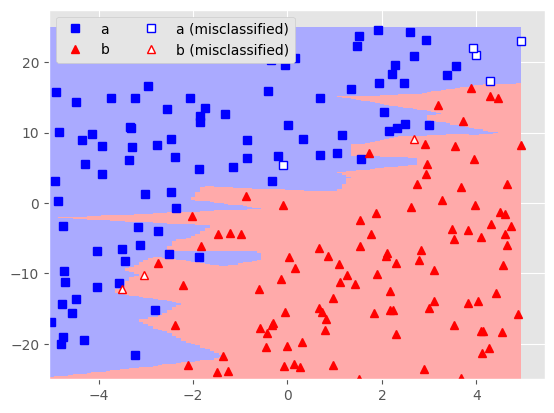

In [17]:
k = 1
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


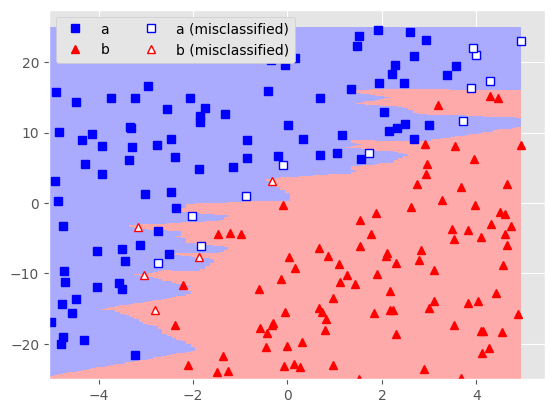

In [18]:
k = 3
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


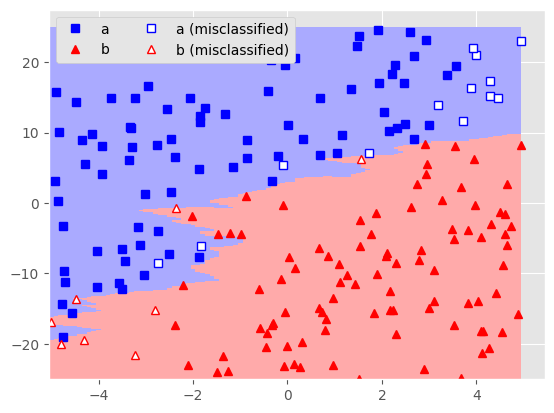

In [19]:
k = 7
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


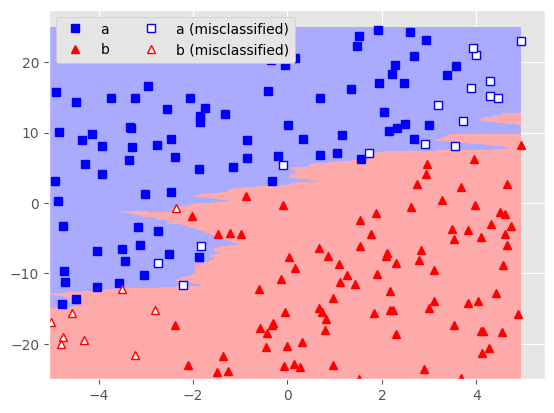

In [20]:
k = 9
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


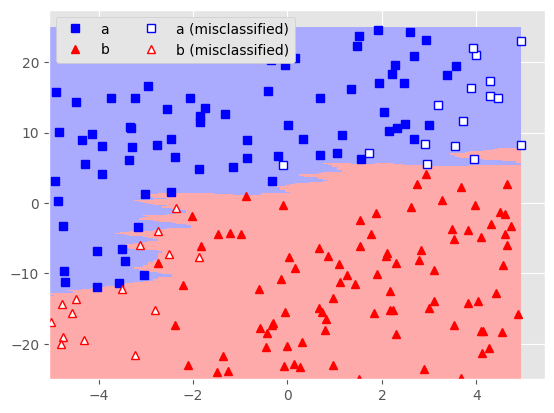

In [21]:
k = 15
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


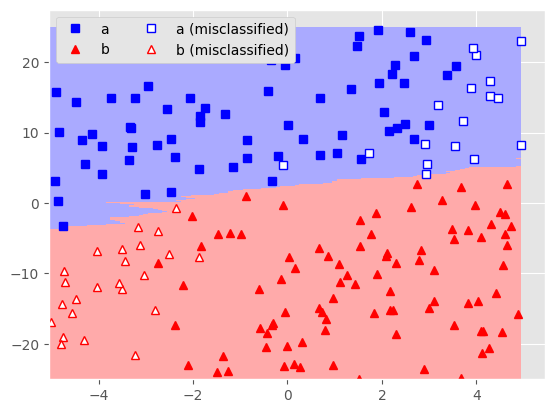

In [22]:
k = 21
model = neighbors.KNeighborsClassifier(k)
model.fit(train[['x','y']], train['class'])
plot_predicted_2(model, data)
plt.show()

## Overfitting/Underfitting
---
Classification is sensitive to the complexity of your model.

In *k*-nearest neighbor classification, you overfit by using too few neighbors, and underfit by using too many neighbors.

The scikit-learn nearest neighbor model can generate a score based on the accuracy of our prediction.  Let's see our training and test curves:

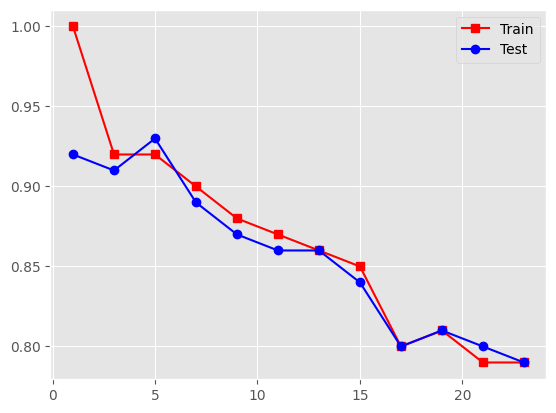

In [23]:
kvals = range(1,25,2)
train_score = []
test_score = []

for k in kvals:
    model = neighbors.KNeighborsClassifier(k)
    model.fit(train[['x','y']], train['class'])
    train_score.append(model.score(train[['x','y']], train['class']))
    test_score.append(model.score(test[['x','y']], test['class']))

plt.plot(kvals, train_score, 'r-s', label='Train')
plt.plot(kvals, test_score, 'b-o', label='Test')
plt.legend()
plt.show()

## Proximity Metric p

#### Distance is used to quantify similarity between data points

#### The more distant, the less similar

Compared to manhattan distance, Euclidean distance is bigger for larger distances, and smaller for closer data points.

Manhattan distance is the sum of absolute distances in each dimension




## Instance-based versus Parametric
---
Instance based methods like KNN, which we used above, *remember* all of the training data, and use it in making new predictions.

Parametric methods (like ordinary least square linear regression) try to learn a parameterized function, e.g.
$$
\begin{align}
    \hat f(\mathbf{x}) & = 1 w_0 + x_1 w_1 + ... + x_k w_k \\
                   & = \phi \cdot \mathbf{w}
\end{align}
$$



## Linear Regression for classificatin
---
This problem asks us to determine the class (binary).

Next, we change the classes into numerical values and use linear regression.

First, we expand our DataFrame with a numerical class column:

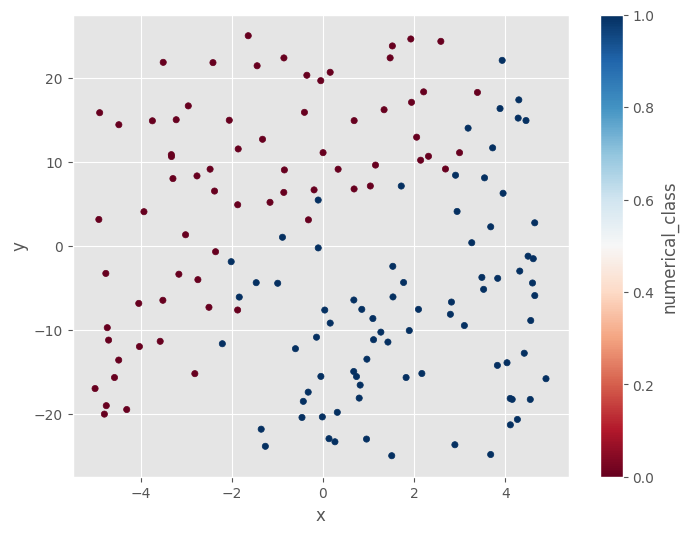

In [24]:
# expand data with numerical class
data['numerical_class'] = 0
data.loc[data['class'] == 'b', 'numerical_class'] = 1
train, test = train_test_split(data)

train.plot(figsize=(8,6), kind='scatter', x='x', y='y',
           c='numerical_class', colormap='RdBu')
plt.show()

Now we train using linear regressio. Our results are no longer discrete values, but we can set a threshold value. For instance, anythong above 0.5 wil b treated as 1, otherwise 0.  

## Logistic Regression
---
Logistic regression takes a slightly different approach. Finds the decision boundary for a binary classification task.

Rather than modeling the two classes as numbers, it attempts to model the *probability* of belonging in one or the other class.

In logistic regression, we fit the model using the *logistic function*, which has a sigmoid shape:
$$
    p(\mathbf{x})  = \frac{e^{1 w_0 + x_1 w_1 + ... + x_k w_k}}{1 + e^{1 w_0 + x_1 w_1 + ... + x_k w_k}}
$$


Large number of features and small number of samples need Linear Models while non-linear models will overfit.


Dataset that has small size and large dimensionality needs linear models

The technique used to find the fit is called the *maximum likelihood* method accessible from scikit-learn. We do not discuss *maximum likelihood* in detail in this course.

In [25]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

Some hyperparamters for Logistic regression:
- Penalty removes correlated features

L1 is a strict penalty, L2 is a less strict penalty (the default used if nothing is assigned)<br>
- C

a bigger number of C is used when there a lot of features but not a lot samples with increase in C, penalty will increase, and model becomes simpler

as you progress, you need to optimize the model,
right now you use a default model

Logistic Regression Model : sigmoid transformation of a linear model b1*x1+b2*x2+I

In [26]:
model.get_params()

# these are hyperparameter

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
#### Create the model by fitting the function with the training data and the corresponding training labels

model.fit(train[['x','y']], train['class'])

LogisticRegression()

In [28]:
# apply model to unseen data
prediction = model.predict(test[['x','y']])
prediction

array(['a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b',
       'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b',
       'a', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a',
       'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a'],
      dtype=object)

Using plotting code, we can see the predictions and the mis-classified points.

In [29]:
def plot_predicted_1(model, test):
    predicted = model.predict(test[['x','y']])
    correct = test[test['class'] == predicted]
    correcta = correct[correct['class'] == 'a']
    correctb = correct[correct['class'] == 'b']
    incorrect = test[test['class'] != predicted]
    incorrecta = incorrect[incorrect['class'] == 'b']
    incorrectb = incorrect[incorrect['class'] == 'a']

    plt.plot(correcta['x'], correcta['y'], 'bs', label='a')
    plt.plot(correctb['x'], correctb['y'], 'r^', label='b')
    plt.plot(incorrecta['x'], incorrecta['y'], 'bs', markerfacecolor='w', label='a (misclassified)')
    plt.plot(incorrectb['x'], incorrectb['y'], 'r^', markerfacecolor='w', label='b (misclassified)')
    plt.legend(loc='upper left', ncol=2, framealpha=1)

The logistic regression model also yields a *decision function*, which gives back the distance for each point from the dividing hyperplane.


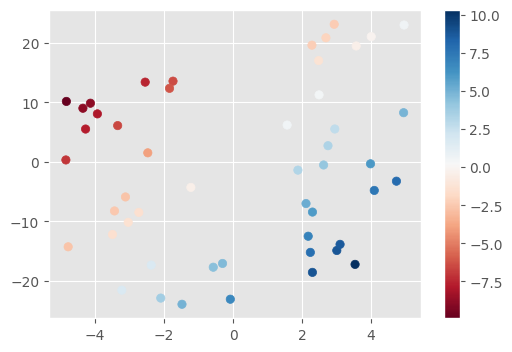

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(test['x'], test['y'],
            c=model.decision_function(test[['x','y']]),
            cmap='RdBu')
plt.colorbar()
plt.show()

Also recall that we were estimating class membership probabilities.  We can retrieve these probabilities and plot them, as well.

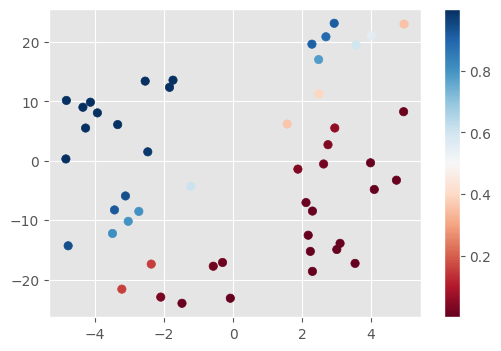

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(test['x'], test['y'],
            c=model.predict_proba(test[['x','y']])[:,0],
            cmap='RdBu')
plt.colorbar()
plt.show()

As before, we visualize the decision boundary by simply plotting all the points in our plane:

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


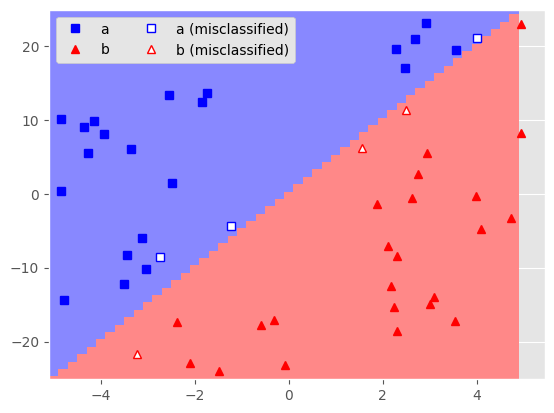

In [32]:
def plot_predicted_2(model, test):
    cmap = ListedColormap(['#8888FF','#FF8888'])
    xmin, xmax, ymin, ymax = -5, 5, -25, 25
    grid_size = 0.2
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grid_size),
                         np.arange(ymin, ymax, grid_size))
    pp = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.array([{'a':0,'b':1}[ab] for ab in pp])
    zz = zz.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plot_predicted_1(model, test)
plot_predicted_2(model, test)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


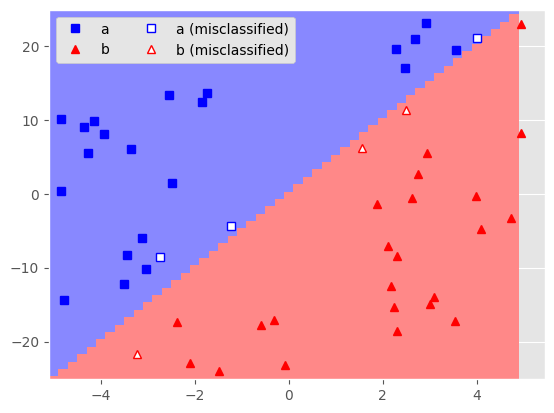

In [33]:
plot_predicted_2(model, test)
plt.show()

We also plot the probabilities in the plane:

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


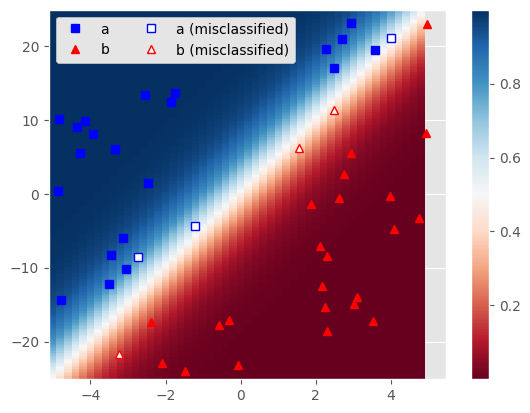

In [34]:
def plot_probabilities(model, test):
    cmap = 'RdBu'
    xmin, xmax, ymin, ymax = -5, 5, -25, 25
    grid_size = 0.2
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grid_size),
                         np.arange(ymin, ymax, grid_size))
    pp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    zz = pp.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plt.colorbar()
    plot_predicted_1(model, test)

plot_probabilities(model, test)
plt.show()

/Users/greysonnewton/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


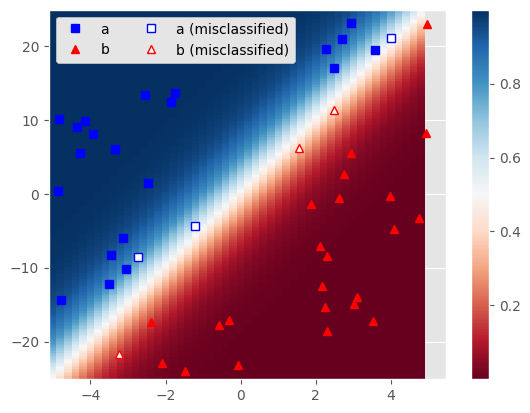

In [35]:
plot_probabilities(model, test)
plt.show()

## Higher Order Logistic Regression
---
As with our linear regression example, we can extend our model using additional *features*, at the possible risk of overfitting.

Let's try a couple of simple polynomial models.

Using sklearn.preprocessing.PolynomialFeatures, we can generate polynomial expansions of our base features to whatever degree desired; however, note that with multiple base features, the size grows very fast!

In our synthetic example, we have x and y input variables.  So a degree-2 polynomial feature set will give us features $(1, x, y, x^2, xy, y^2)$


### To-do
how would you extend this code to include higher-order features?

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Assume X_train is your input data for training the model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit your model with the transformed data
model.fit(X_poly, y_train)

# Modify the plot_probabilities function to use polynomial features

def plot_probabilities(model, test):
    cmap = 'RdBu'
    xmin, xmax, ymin, ymax = -5, 5, -25, 25
    grid_size = 0.2
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grid_size),
                         np.arange(ymin, ymax, grid_size))
    # Create polynomial features for the grid
    grid_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])
    pp = model.predict_proba(grid_poly)[:,0]
    zz = pp.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, zz, cmap = cmap)
    plt.colorbar()
    plot_predicted_1(model, test)

plot_probabilities(model, test)
plt.show()


NameError: name 'X_train' is not defined